### Libraries:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Quick check and Reformatting Data:

In [ ]:
df = pd.read_excel("data/loop-data-ldw-2026.xlsx")

df['Visit Date'] = pd.to_datetime(df['Visit Date'])

df.rename(columns = {'Did you bring donations with you today?':'Donation'}, inplace = True)
df= df.fillna(0)

clothes =['Collared Shirts','Sweaters','Pants','Skirts','Shorts','Dresses','Outerwear','Shoes','Accessories']
df['Donation']

df['Donation'] = df['Donation'].replace({
    'Yes': 1,
    'Donated at blue bin': 1,
    'No': 0
})

0       No
1       No
2      Yes
3       No
4       No
      ... 
872     No
873     No
874     No
875    Yes
876     No
Name: Donation, Length: 877, dtype: object

### Regrouping the data:

In [12]:
features = [
    'Tops','Collared Shirts','Sweaters','Pants','Skirts',
    'Shorts','Dresses','Outerwear','Shoes','Accessories'
]

# group means
g = df.groupby('Donation')[features].mean()   # index: 0,1  columns: features

g = g.T
print(g.columns)
g.rename(columns={0:'value1'}, inplace=True)
g.rename(columns={1:'value2'}, inplace=True)
 
g.columns

# Reorder it following the values of the first value:
ordered_df = g.sort_values(by='value1')

my_range=range(1,len(g.index)+2)
 
ordered_df.reset_index(inplace=True)

df.index.name = 'features'

ordered_df
ordered_df.columns.drop('index')


ordered_df = ordered_df.reset_index(drop=True)

total_row = pd.DataFrame({
    'Donation': ['All Categories (Mean)'],
    'index': ['All Categories (Mean)'],
    'value1': [ordered_df['value1'].mean()],
    'value2': [ordered_df['value2'].mean()],
})

ordered_df = pd.concat([ordered_df, total_row], ignore_index=True)

ordered_df



Index([0, 1], dtype='int64', name='Donation')


,index,value1,value2,Donation
0,Shorts,0.071130,0.190476,NaN
1,Shoes,0.089958,0.125313,NaN
2,Outerwear,0.125523,0.192982,NaN
3,Skirts,0.140167,0.182957,NaN
4,Accessories,0.196653,0.235589,NaN
5,Dresses,0.211297,0.328321,NaN
6,Collared Shirts,0.215481,0.295739,NaN
7,Pants,0.326360,0.621554,NaN
8,Sweaters,0.349372,0.453634,NaN
9,Tops,0.895397,1.205514,NaN


### Plotting:

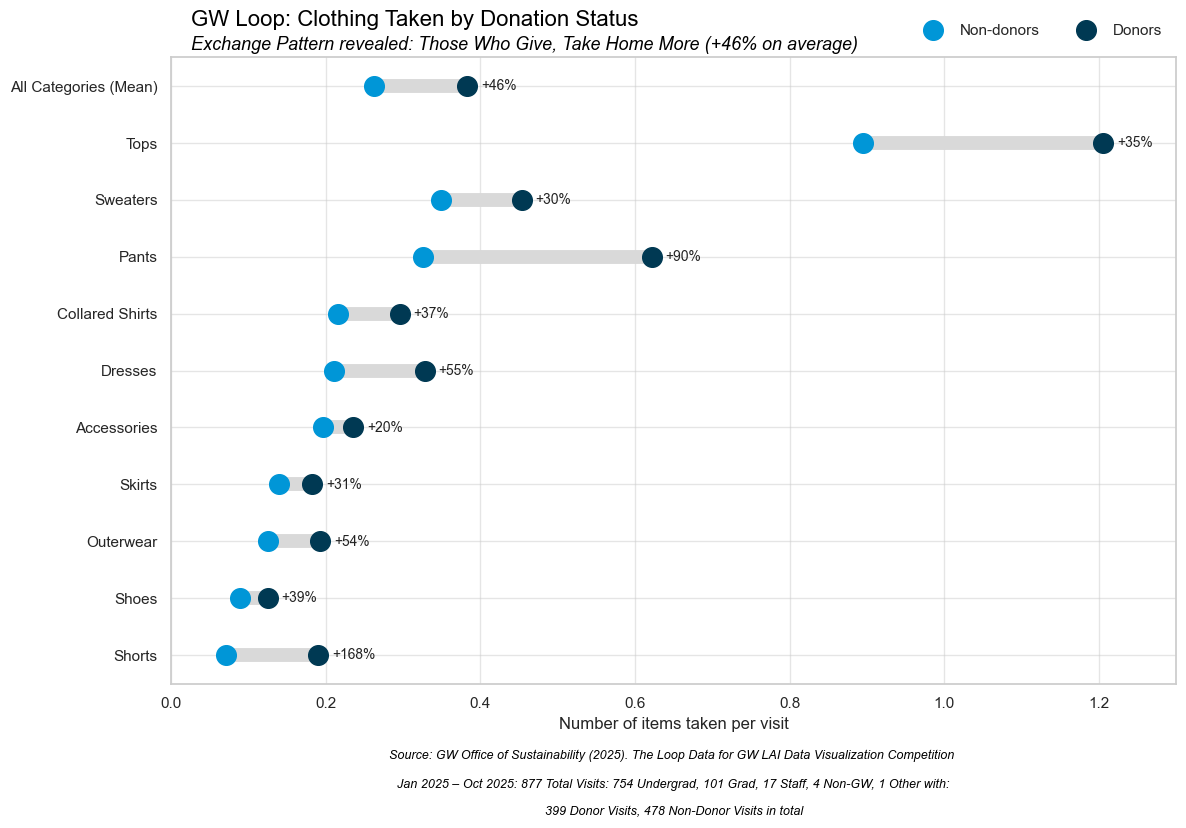

,value1,value2,pct_change
0,0.071130,0.190476,1.677871
1,0.089958,0.125313,0.393017
2,0.125523,0.192982,0.537427
3,0.140167,0.182957,0.305278
4,0.196653,0.235589,0.197995
5,0.211297,0.328321,0.553835
6,0.215481,0.295739,0.372460
7,0.326360,0.621554,0.904505
8,0.349372,0.453634,0.298426
9,0.895397,1.205514,0.346345


In [34]:
#Colors
COL_NONDONOR ="#0096d7"   
COL_DONOR    = "#003953"  
COL_LINE_POS = "#d9d9d9"   
COL_LINE_NEG = "#d57883"   
my_range = np.arange(1, len(ordered_df) + 1)

#golden ratio: to have 'perfect' width/height ratio of the plot frame!
phi = 1.618
n = len(ordered_df)
height = 0.55 * (n) + 1.5
width  = height * phi

fig, ax = plt.subplots(figsize=(width, height))

df_diff = ordered_df.copy()
df_diff["pct_change"] = df_diff["value2"] / df_diff["value1"] - 1

colors = np.where(
    df_diff["value2"] > df_diff["value1"],
    COL_LINE_POS,
    COL_LINE_NEG
)
ax.hlines(
    y=my_range,
    xmin=df_diff["value1"],
    xmax=df_diff["value2"],
    color=colors,
    linewidth=10,
    zorder=1
)
ax.scatter(
    df_diff["value1"], my_range,
    color=COL_NONDONOR,
    s=200,
    label="Non-donors",
    zorder=3
)
ax.scatter(
    df_diff["value2"], my_range,
    color=COL_DONOR,
    s=200,
    label="Donors",
    zorder=3
)

#annotations:
for (_, row), y in zip(df_diff.iterrows(), my_range):
    ax.annotate(
        f"{row['pct_change']:+.0%}",
        xy=(row["value2"], y),          # 2015/donor dot
        xytext=(10, 0),                 # 10 pt to the RIGHT, same height
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=10,
        color="#222222",
        clip_on=False,
        zorder=4
    )



ax.set_yticks(my_range)
ax.set_yticklabels(df_diff["index"])
ax.set_xlabel("Number of items taken per visit")

#main title
ax.text(
    x=0.02, y=1.06,
    s="GW Loop: Clothing Taken by Donation Status",
    ha="left",
    va="center",
    fontsize=16,
    color="black",    
    transform=ax.transAxes
)
#sub title, italic:
ax.text(
    x=0.02, y=1.02,
    s="Exchange Pattern revealed: Those Who Give, Take Home More (+46% on average)",
    ha="left",
    va="center",
    style="italic",
    fontsize=13,
    color="black",    
    transform=ax.transAxes
)
ax.grid(axis="x", alpha=0.5)
ax.grid(axis="y", alpha=0.5)
ax.legend(
    ncol=2,
    bbox_to_anchor=(1.0, 1.01),
    loc="lower right",
    frameon=False
)


fig.subplots_adjust(left=0.35)
fig.tight_layout()
plt.xlim(0, 1.3)

fig = plt.gcf()
plt.annotate(
    "Source: GW Office of Sustainability (2025). "
    "The Loop Data for GW LAI Data Visualization Competition \n\n"
    "Jan 2025 – Oct 2025: 877 Total Visits: 754 Undergrad, 101 Grad, 17 Staff, 4 Non-GW, 1 Other with:\n\n"
    "399 Donor Visits, 478 Non-Donor Visits in total",
    xy=(0.5, -0.16),            
    style="italic",
    xycoords="axes fraction",
    ha="center",
    va="center",
    fontsize=9,
    color="black",
    url="https://gwu.box.com/s/498wga8hci1wuxqigjeluwoalvhq39z9"
)

plt.show()

df_diff[["value1", "value2", "pct_change"]]


#took formatting help from ChatGPT


In [ ]:
df['Donation'].value_counts()

Donation
0    478
1    399
Name: count, dtype: int64

In [ ]:
df